<a href="https://colab.research.google.com/github/Himadrichutia/Prediction-using-Supervised-ML-Task1-/blob/main/Prediction_using_Supervised_Model(Task1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
## To predict the percentage of marks of an student based on the number of study hours
  - We have to use Simple linear regression for prediction purpose

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings("ignore")


# Importing the datset

In [ ]:
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

# Exploring the dataset

In [ ]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.shape

(25, 2)

In [ ]:
# Collecting the information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Describing the dataset(statistics)
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


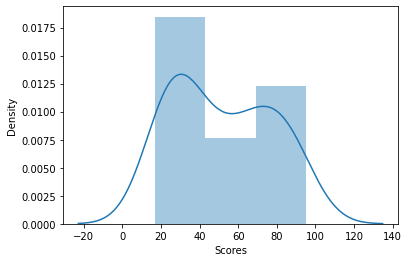

In [ ]:
sns.distplot(dataset['Scores'])

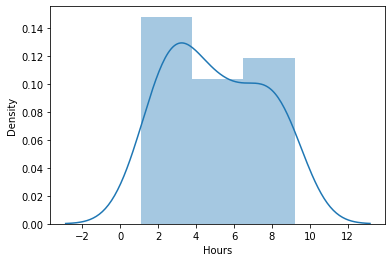

In [ ]:
sns.distplot(dataset['Hours'])

In [ ]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


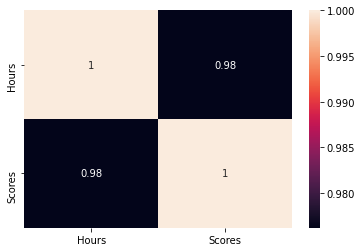

In [ ]:
sns.heatmap(dataset.corr(), annot = True)

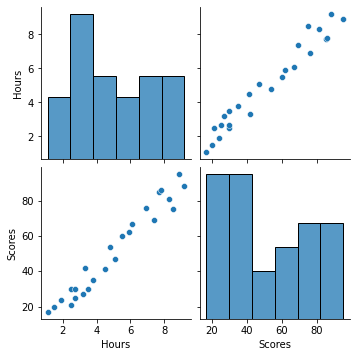

In [ ]:
sns.pairplot(dataset)

- From the graph we can see that scores and hours of study are highly correlated

{'boxes': [<matplotlib.lines.Line2D at 0x7fbdbbe738d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbdbbe7e320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbdbbe7eda0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbdbbe7ea20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbdbbe73be0>,
  <matplotlib.lines.Line2D at 0x7fbdbbe73f60>]}

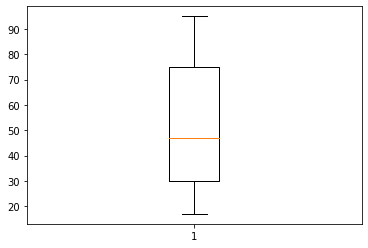

In [ ]:
plt.boxplot(dataset['Scores'])

# Preparing the data

In [ ]:
x = dataset.iloc[:,:1].values
y = dataset.iloc[:,-1].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 0)

# Training the model using Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

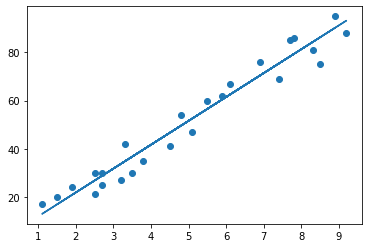

In [ ]:
# Plotting the regression line
line = lr.coef_*x+lr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Prediction

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE=',rmse)
r2=r2_score(y_test,y_pred)
print('R2 score =',r2)

RMSE= 4.647447612100373
R2 score = 0.9454906892105354


In [ ]:
prediction_score = lr.predict([[9.25]])
print('Percentage of score', prediction_score)

Percentage of score [93.69173249]


In [ ]:
## Thank YOU